In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft


def fft_plot(x, f_s, freqs):
  
    X = fft.fft(x)
    X = np.abs(X)
    
    fig, ax = plt.subplots()

    ax.stem(freqs, X)
    ax.set_xlabel('Frequency in Hertz [Hz]')
    ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
    ax.set_xlim(0, f_s/2)
    return X

def noise_freq_func(X, freqs, constraint):
  
    noise_freqs = freqs[np.abs(X) == constraint]
    return noise_freqs
    
def filter_func(X, freqs, noise_freqs):

    X[np.isin(freqs, noise_freqs)] = 0 # Set elements in X to 0 where the mask is True
    print(X)

    X_filtered = X
    
    x_filtered = np.abs(fft.ifft(X_filtered))
    t = np.linspace(0, 2, 2 * f_s, endpoint=False)
    
    fig, ax = plt.subplots()
    ax.plot(t, x_filtered)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Signal amplitude')
    return X_filtered


/opt/anaconda/jupyter/envs/jupyter-base/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


[5.64181864e-12 3.71494337e-12 2.34737968e-12 1.67270823e-12
 5.17356227e-12 4.54378986e-12 4.89220118e-12 9.87553892e-12
 5.54402345e-12 4.38749636e-12 5.14063414e-12 2.96210161e-12
 1.11035342e-11 5.64923044e-12 1.04228876e-11 1.75760341e-11
 2.17950030e-11 2.09144116e-11 7.35444131e-12 5.60193230e-12
 5.00000000e+01 5.09874578e-12 4.05829259e-12 2.63181600e-12
 7.40171539e-12 2.62654548e-12 3.40530722e-12 2.21102206e-12
 4.52822042e-12 1.55407444e-12 3.16447686e-12 1.14291914e-11
 5.00381140e-12 3.66945968e-12 6.44980387e-12 6.21896522e-12
 1.42832251e-12 2.42047985e-12 9.79709845e-12 2.47651249e-12
 4.14062228e-12 1.61845443e-11 3.93573777e-12 1.34806127e-11
 1.62246747e-11 1.63319846e-11 1.03085769e-11 3.95156387e-12
 1.89499073e-12 2.57560993e-12 4.40212807e-12 3.89454068e-12
 2.51244129e-12 1.31623304e-11 1.29985745e-11 1.25331547e-11
 6.27350363e-12 7.26546630e-12 8.07671609e-13 5.65818690e-12
 6.09703403e-12 1.20084962e-11 2.02954225e-11 1.21803103e-11
 4.30830351e-12 3.569593

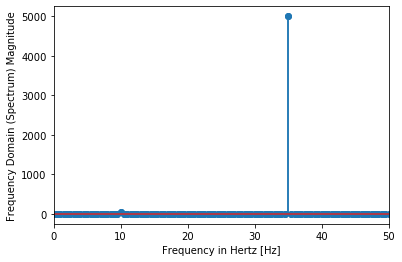

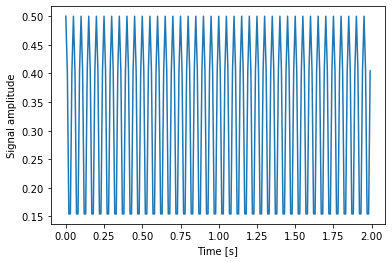

In [59]:
f_s = 100

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x1 = 0.5*np.sin(10 * 2 * np.pi * t)
x2 = 50*np.sin(10 * (7/2) * 2* np.pi * t)
x = x1+x2

freqs = np.abs(fft.fftfreq(len(x)) *f_s)

X = fft_plot(x, f_s, freqs)
noise_freqs = noise_freq_func(X, freqs, np.max(np.abs(X)))
X_filtered = filter_func(X, freqs, noise_freqs)
    